In [38]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

In [11]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")

In [12]:
classes = ['cats', 'dogs', 'horses', 'humans']

In [13]:
for c in classes:
    if not os.path.isdir("val_images/"+ c):
        os.mkdir("val_images/"+ c)

In [14]:
SPLIT = 0.9

for dirc in os.listdir("images"):

    p = "images/" + dirc
    if "." in p:
        continue
    imgs = os.listdir(p)
    split_size = int(len(imgs)*SPLIT)
    files_to_move = imgs[split_size:]
    print(files_to_move)

    for f in files_to_move:
        src =  os.path.join(p, f)
        dest = os.path.join("val_images/", dirc)

        shutil.move(src, dest)

['dog.39.jpg', 'dog.140.jpg', 'dog.197.jpg', 'dog.183.jpg', 'dog.182.jpg', 'dog.196.jpg', 'dog.141.jpg', 'dog.155.jpg', 'dog.38.jpg', 'dog.10.jpg', 'dog.169.jpg', 'dog.12.jpg', 'dog.143.jpg', 'dog.157.jpg', 'dog.180.jpg', 'dog.194.jpg', 'dog.195.jpg', 'dog.181.jpg', 'dog.156.jpg', 'dog.142.jpg', 'dog.13.jpg']
['cat.168.jpg', 'cat.17.jpg', 'cat.16.jpg', 'cat.169.jpg', 'cat.141.jpg', 'cat.155.jpg', 'cat.182.jpg', 'cat.196.jpg', 'cat.8.jpg', 'cat.180.jpg', 'cat.194.jpg', 'cat.28.jpg', 'cat.143.jpg', 'cat.157.jpg', 'cat.14.jpg', 'cat.15.jpg', 'cat.156.jpg', 'cat.142.jpg', 'cat.29.jpg', 'cat.195.jpg', 'cat.181.jpg']
['rider-3.jpg', 'rider-22.jpg', 'rider-36.jpg', 'rider-128.jpg', 'rider-114.jpg', 'rider-100.jpg', 'rider-101.jpg', 'rider-115.jpg', 'rider-129.jpg', 'rider-37.jpg', 'rider-23.jpg', 'rider-2.jpg', 'rider-35.jpg', 'rider-21.jpg', 'rider-103.jpg', 'rider-117.jpg', 'rider-116.jpg', 'rider-102.jpg', 'rider-20.jpg', 'rider-34.jpg', 'rider-1.jpg']
['horse-38.jpg', 'horse-39.jpg', 'hor

In [15]:
for dirc in os.listdir("images/"):
    p = "images/" + dirc
    if "." in p:
        continue
    img = os.listdir(p)
    print(dirc, len(img))

dogs 181
cats 181
humans 181
horses 181


In [16]:
for dirc in os.listdir("val_images/"):
    p = "val_images/" + dirc
    if "." in p:
        continue
    img = os.listdir(p)
    print(dirc, len(img))

dogs 21
cats 21
humans 21
horses 21


# CNN Model

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten 
from keras.utils import to_categorical

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size= (3,3), activation ='relu', input_shape =(28,28,3) ))
model.add(MaxPool2D(pool_size= (2,2) ))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size= (2,2) ))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", ))
model.add(Flatten())
model.add(Dense(units=4, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1156      
Total para

In [33]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics= ['accuracy'])

# Image Augmentation

In [26]:
from keras.preprocessing import image

In [27]:
train_datagen = image.ImageDataGenerator(rotation_range=20, 
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.2,
                         zoom_range=0.3,
                         horizontal_flip=True,
                        rescale=1/255.)

In [28]:
val_datagen  = image.ImageDataGenerator(rescale= 1.0/255)

In [30]:
train_generator = train_datagen.flow_from_directory("images/",
                                  target_size=(28,28),  # image ka size
                                  class_mode='categorical',
                                  shuffle=True,
                                  batch_size=32 )

Found 724 images belonging to 4 classes.


In [31]:
train_generator.class_indices

{'cats': 0, 'dogs': 1, 'horses': 2, 'humans': 3}

In [32]:
val_generator = val_datagen.flow_from_directory("val_images/", 
                                                target_size=(28,28), 
                                                class_mode='categorical', 
                                                batch_size=32)

Found 84 images belonging to 4 classes.


(32, 28, 28, 3) (32, 4)


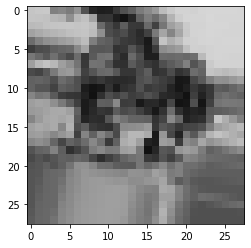

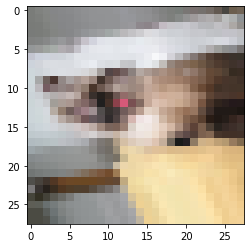

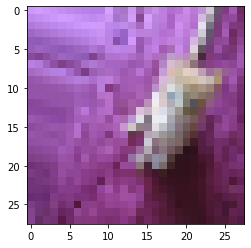

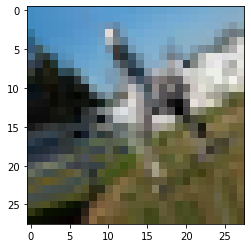

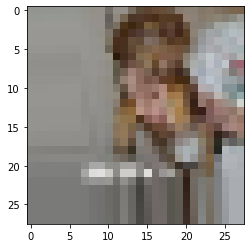

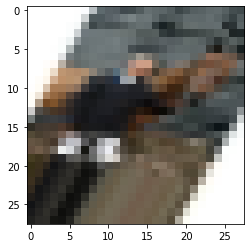

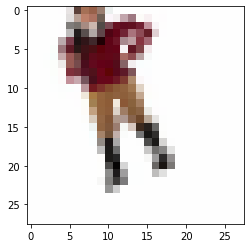

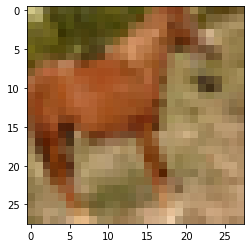

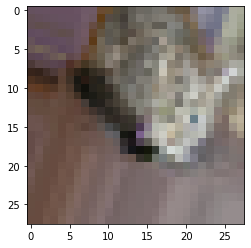

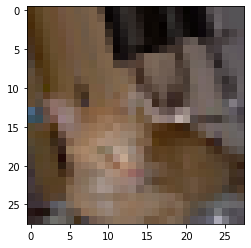

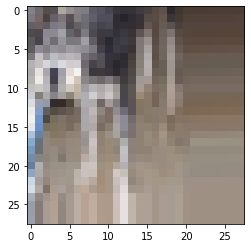

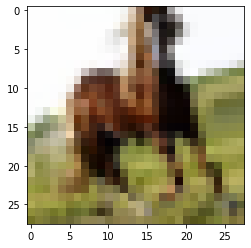

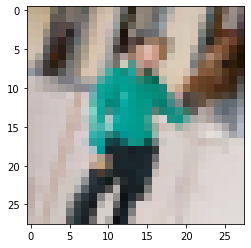

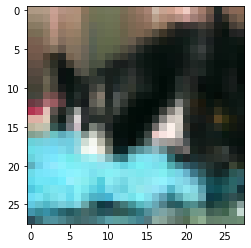

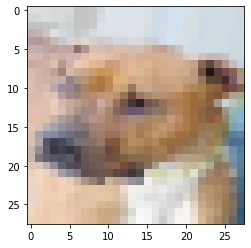

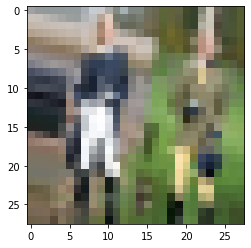

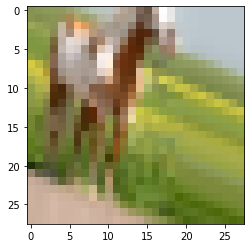

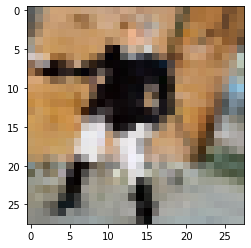

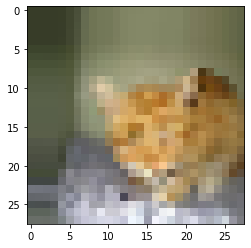

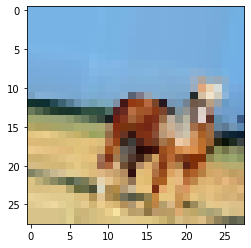

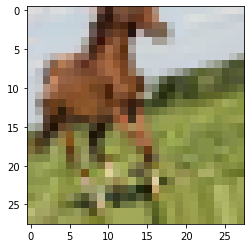

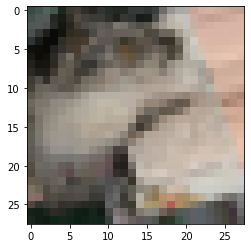

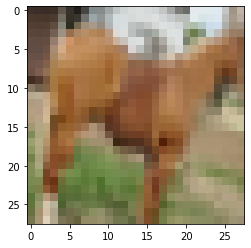

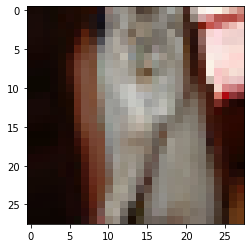

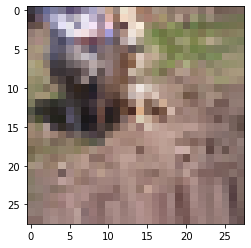

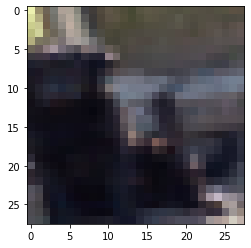

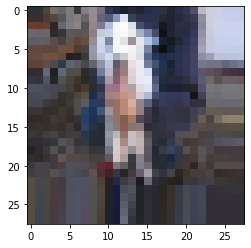

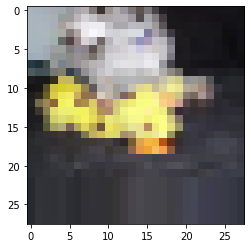

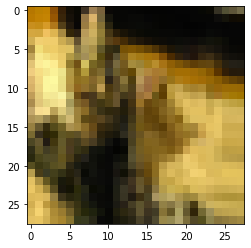

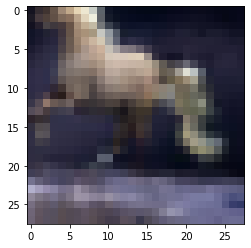

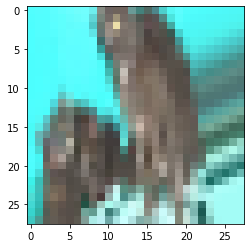

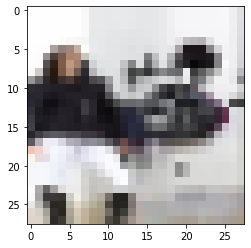

In [41]:
for i in train_generator:
    print(i[0].shape, i[1].shape)
    for c in i[0]:
        plt.imshow(c.reshape(28,28,3))
        plt.show()
    break

In [42]:
hist = model.fit_generator(train_generator, steps_per_epoch= 724//32, epochs=10, validation_data= val_generator, validation_steps=81//32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
22/22 [==============================] - 7s 334ms/step - loss: 1.3841 - acc: 0.2707 - val_loss: 1.3567 - val_acc: 0.4375
Epoch 2/10
22/22 [==============================] - 5s 209ms/step - loss: 1.3670 - acc: 0.3053 - val_loss: 1.3293 - val_acc: 0.3846
Epoch 3/10
22/22 [==============================] - 5s 212ms/step - loss: 1.3301 - acc: 0.3639 - val_loss: 1.2928 - val_acc: 0.3462
Epoch 4/10
22/22 [==============================] - 4s 194ms/step - loss: 1.2608 - acc: 0.4281 - val_loss: 1.1361 - val_acc: 0.4844
Epoch 5/10
22/22 [==============================] - 5s 236ms/step - loss: 1.2274 - acc: 0.4375 - val_loss: 1.3462 - val_acc: 0.3846
Epoch 6/10
22/22 [==============================] - 6s 290ms/step - loss: 1.1944 - acc: 0.4716 - val_loss: 1.2208 - val_acc: 0.4615
Epoch 7/10
22/22 [==============================] - 6s 259ms/step - loss: 1.1868 - acc: 0.4856 - val_loss: 1.6020

In [46]:
#model.predict_classes

In [45]:
#model.evaluate

In [44]:
#model.predict_classes